## Pandas 101 

### Finding insight every angles

**Some insight to work on**
- country with highest customers
- items with high sales
- currency used most
- customer Id with Highest patronage
- top 10 customers and their location
- number of (sucess, failed and cancelled) transactions
- country with most success trnasaction
- customer with high (sucess, failed and cancelled)
- day with most checkout (sucess, failed and cancelled)
- which currency has most (sucess, failed and cancelled) transaction
- which item has most (sucess, failed and cancelled) transaction

In [47]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# loading the data
sales_data= pd.read_csv("sales_data.xls")

In [49]:
# checking and cleaning the data if dirty
sales_data.head()
sales_data.isna().sum()
sales_data.isnull().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

In [50]:
sales_data.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status', 'location'],
      dtype='object')

### Country with highest customers

the total number of different customers countries: 243
location
Korea        6997
Argentina    4507
Mauritius    4414
Jersey       4130
Panama       3936
             ... 
Chad         1082
Malaysia     1037
Austria       921
Italy         783
Uruguay       734
Name: count, Length: 243, dtype: int64


<Axes: title={'center': 'Top ten countries with most patronage'}, xlabel='Customers location', ylabel='Numbers of patronages'>

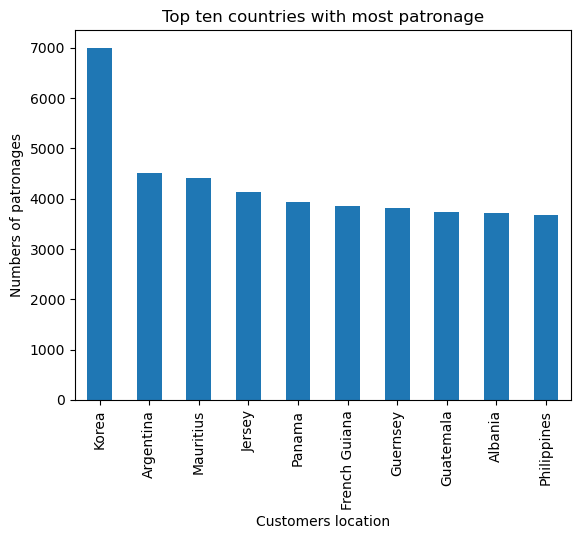

In [51]:
#finding the numbers of different countries of customers
diff_locations=sales_data["location"].nunique()
print(f"the total number of different customers countries: {diff_locations}")

#getting the top ten contries 
location_sales=sales_data.location.value_counts()
print(location_sales)
location_sales.head(10).plot(kind="bar", xlabel="Customers location", ylabel="Numbers of patronages", title="Top ten countries with most patronage")

### Items with high sales

<Axes: title={'center': 'Top 5 Item_id with most sales'}, ylabel='Sales count'>

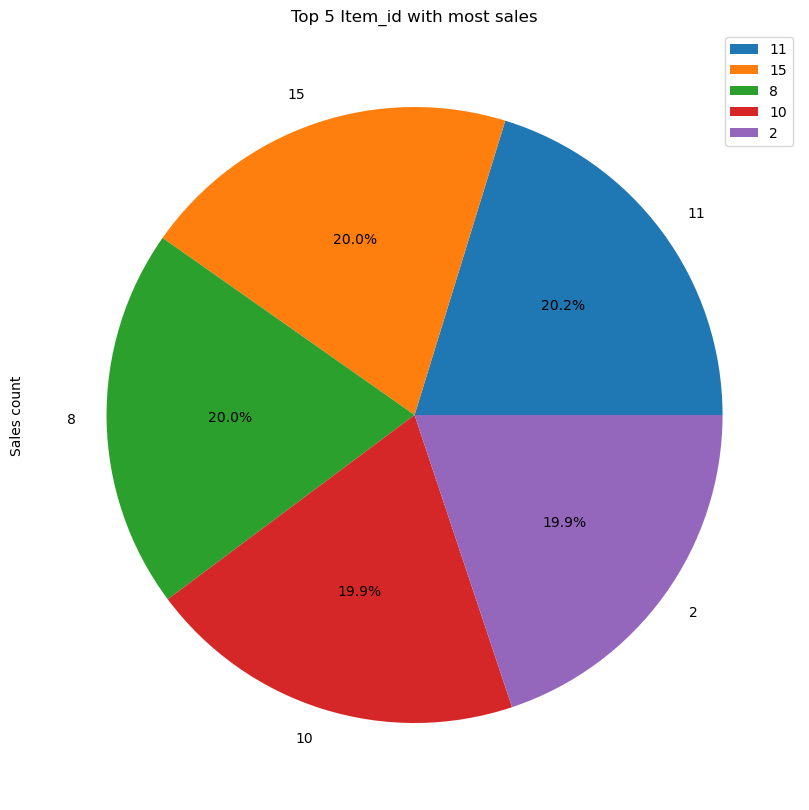

In [63]:
item_sales= sales_data["item_id"].value_counts()
item_sales
# item with item_id 11 has the highest sales

# let plot the top 5 on pie chart.
item_sales.head(5).plot(kind="pie",ylabel="Sales count",title="Top 5 Item_id with most sales",figsize=(12,10), autopct="%1.1f%%", legend=True)

### Currency used most

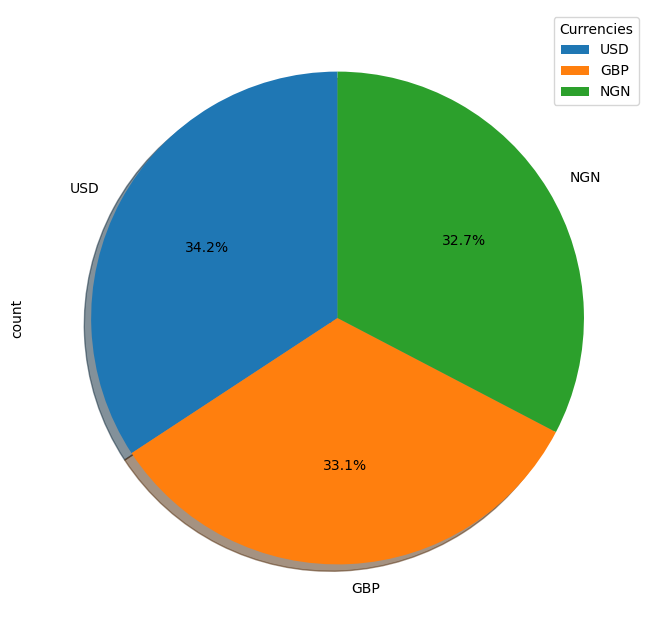

In [61]:
currencies= sales_data.currency.value_counts()
# USD is the must used currency, so, let put it on pie chart
currencies.plot(figsize=(10,8), kind="pie", autopct="%1.1f%%", startangle=90, shadow=True)
plt.legend(title="Currencies")

### Customer Id with Highest patronage

customer_id
eb7dcb88-073d-403e-bdd4-1e5725fe2338    372
ebcb2343-be1b-421e-83eb-6f79a321d999    360
c391f179-9eb3-418d-9d7b-b261f2dc57a6    360
a7d9058a-163e-4632-9bde-1f57130130cb    360
12e94262-2eaa-47d9-85c9-6f55e434f5c8    360
                                       ... 
020a728c-76fb-404e-9135-ae9ccd7709ee      3
48139381-c62f-486a-85c0-f44a8fdc16a9      3
f054489f-ca25-4bea-8994-723d1881ab1f      3
ea724654-3ddb-4ffb-bb69-d36ee291c7cf      3
dc9500b1-19ba-40e5-b76e-2a295782dbbb      3
Name: count, Length: 4594, dtype: int64


<Axes: title={'center': 'Top Customers'}, ylabel='customer_id'>

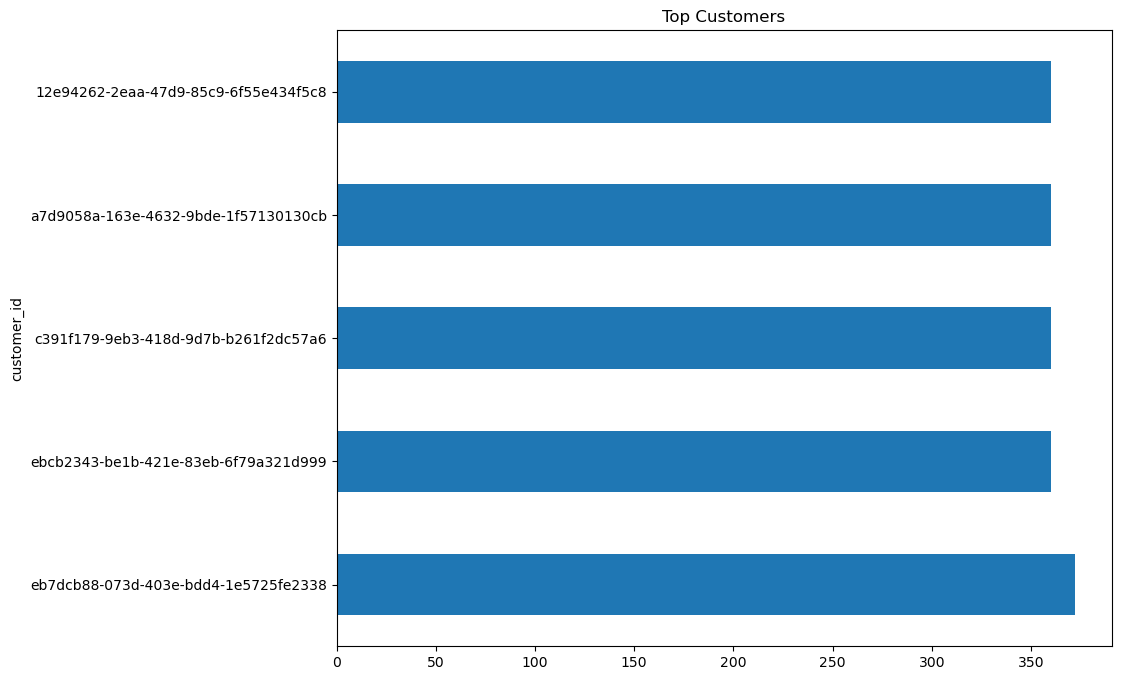

In [73]:
# get all distinct count of customer
customers= sales_data.customer_id.value_counts().sort_values(ascending=False)
print(customers)
# custumer id: eb7dcb88-073d-403e-bdd4-1e5725fe2338  has the highest patronage
# let visualize top 5 customers 
customers.head(5).plot(figsize=(10,8), kind="barh", title="Top Customers")


### Top 10 and bottom 5 customers and their location

In [ ]:
customer_loc= sales_data.groupby("customer_id")["location"].value_counts().sort_values(ascending=False)
Top10_customer=customer_loc.iloc[:10]

Top10_customer
# let see the lowest 5 patronage customer
bottom5_customer= customer_loc.iloc[-5:]

# ploting top 10 customer 
Top10_customer.plot(figsize=(10,8), kind="bar")

customer_id                           location                   
eb7dcb88-073d-403e-bdd4-1e5725fe2338  Saint Helena                   372
be8ce4e3-c596-43c2-8b70-bdcecada2139  Comoros                        360
e4431b51-8db8-4b4a-a871-d12e3eaca47d  Bolivia                        360
ebcb2343-be1b-421e-83eb-6f79a321d999  Wallis and Futuna              360
12e94262-2eaa-47d9-85c9-6f55e434f5c8  United Kingdom                 360
ebcea232-0615-44be-8f9e-338100c6b31c  Zimbabwe                       360
c391f179-9eb3-418d-9d7b-b261f2dc57a6  Argentina                      360
a7d9058a-163e-4632-9bde-1f57130130cb  Nauru                          360
d3cd2a61-03cf-4749-b693-5e5dc4f32b9c  French Southern Territories    348
9ff854ce-3c64-4519-8bc8-4f33713a1457  Tuvalu                         348
Name: count, dtype: int64